# Final Project 2: Exploratory Data Analysis on University Rankings

This case study consists of 3 parts: 


A. Data understanding and exploration
- Student to decide how to explore, inspect and cleanse the data 

B. Questions: 6 in total
- Answer the questions and derive the requested outputs with necessary explanations and inferences 

C. Open-ended Question 
- Student to decide the scope and methods/packages to use to answer the question and derive insights

The data reflects four years of ranking, 2012, 2013, 2014, 2015; 2012 and 2013 consists of the top 100 universities while 2014, and 2015 are the top 1000 universities. The data could be assessed on a yearly basis to uncover trends. 

The data was collected by The Center for World University Rankings. Sampling was weighted based on the following criteria: research output, (10%), high-quality publication, (10%), influence, (10%), citations, (10%), quality of faculty, (10%), alumni employment, (25%), quality of education, (25%). The totals of the above criteria is then used te create an aggregation and scoring. 

Data dictionary:
- World_rank - World rank for the university.
- Institution - Name of the university.
- Country - Country of each university.
- National_Rank - Rank of university within its country.
- Quality_of_education - Rank for quality of education; measured by the number of a university's alumni who have garnered major international accolades, i.e. Pulitzer, Nobel Prize.
- Alumni_employment - Rank for alumni employment; measured by the number of a university's alumni who have held CEO positions at multinational companies in relation to the university's size.
- Quality_of_faculty - Rank for quality of faculty; measured by the number of faculty who have won major international awards.
- Publications - Rank for publications.
- Influence - Rank for influence.
- Citations - Rank for citations.
- Broad_impact - Rank for broad impact (only available for 2014 and 2015).
- Patents - Rank for patents.
- Score - Total score, used for determining world rank.
- Year - Years of ranking (2012 to 2015).

# A. Data Understanding and exploration

### Read the cwur.Data.csv file and inspect the data, understand the data (what are the components, how it looks like, and some basic statistics about the variables). Take necessary steps to address any problems or issues with the data and fix them with appropriate measures.

In [1]:
import numpy as np
import pandas as pd
# pd.options.display.max_rows = 2200
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as offline
offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white')

In [2]:
df = pd.read_csv("cwurData.csv")
print(df.info(), "\n") #200 null broad_impact data

# Select duplicate rows except first occurrence based on all columns. Not meaning to check for duplicate in each column.
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows based on all columns are :", duplicateRowsDF)

is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print("Null values row:", len(rows_with_NaN)) #Broad_impact - Rank for broad impact (only available for 2014 and 2015).
rows_with_NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB
None 

Dupli

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,Australian National University,Australia,2,101,101,43,101,101,101,NaN,101,44.50,2013
196,97,University of Alberta,Canada,4,101,101,101,68,101,92,NaN,81,44.50,2013
197,98,University of Helsinki,Finland,1,69,101,81,74,79,71,NaN,101,44.39,2013
198,99,Paris Diderot University - Paris 7,France,5,28,101,72,101,87,101,NaN,101,44.36,2013


In [3]:
df.describe() #check for max/min value to see if it is wise to use mean to fill broad impact NaN value

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [4]:
#samples check for broad impact value to see if it is wise to use mean to fill NaN value. 
#You will be dragging down the score of broad impact for these top instituitions!
print("Broad_impact mean:", df.broad_impact.mean()) 
check=df.sort_values(by = ['institution', 'year'], ascending = [True, True])
check[check.institution.isin(['University of Cambridge', 'Australian National University', 'Boston University'])][['world_rank','institution','year','broad_impact']]

Broad_impact mean: 496.6995


,world_rank,institution,year,broad_impact
195,96,Australian National University,2013,NaN
359,160,Australian National University,2014,196.0
1378,179,Australian National University,2015,188.0
61,62,Boston University,2012,NaN
153,54,Boston University,2013,NaN
266,67,Boston University,2014,37.0
1265,66,Boston University,2015,34.0
3,4,University of Cambridge,2012,NaN
104,5,University of Cambridge,2013,NaN
203,4,University of Cambridge,2014,13.0


In [5]:
#replacing broad impact NaN value with countries average broad impact mean
bim = df.groupby('institution')['broad_impact'].transform('mean')
df['broad_impact'].fillna(bim, inplace= True)
check=df.sort_values(by = ['institution', 'year'], ascending = [True, True])
check[check.institution.isin(['University of Cambridge', 'Australian National University', 'Boston University'])][['world_rank','institution','year','broad_impact']]

,world_rank,institution,year,broad_impact
195,96,Australian National University,2013,192.0
359,160,Australian National University,2014,196.0
1378,179,Australian National University,2015,188.0
61,62,Boston University,2012,35.5
153,54,Boston University,2013,35.5
266,67,Boston University,2014,37.0
1265,66,Boston University,2015,34.0
3,4,University of Cambridge,2012,13.0
104,5,University of Cambridge,2013,13.0
203,4,University of Cambridge,2014,13.0


In [6]:
#check for broad impact NaN value again. still got 1 null value because this institution only made it to top 100 in 2012
print(df.info(), "\n")
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2199 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB
None 



,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
94,95,Williams College,USA,57,18,15,101,101,101,101,NaN,101,43.89,2012


In [7]:
#checking for correlation for broad impact. world_rank has the highest correlation.
cor=df.corr()
bicor = pd.DataFrame(cor['broad_impact'][:].nlargest(), columns = ['broad_impact'])
bicor

,broad_impact
broad_impact,1.000000
world_rank,0.949689
publications,0.929408
influence,0.928080
citations,0.876017


In [8]:
#Hence use other years world rank 95 to find mean of broad impact
check1=df.sort_values(by = 'year', ascending = True)
check1[check1.world_rank==95][['world_rank','institution','year','broad_impact']]

# check[check.institution.isin(['Williams College', 'Tohoku University', 'University of Sydney', 'Tufts University'])][['world_rank','institution','year','broad_impact']]

,world_rank,institution,year,broad_impact
94,95,Williams College,2012,NaN
194,95,Tohoku University,2013,115.5
294,95,University of Sydney,2014,94.0
1294,95,Tufts University,2015,85.0


In [9]:
#patching NaN broad impact with world rank 95 from other years broad impact mean
wrm = df[df.world_rank==95].broad_impact.mean()
df['broad_impact'].fillna(wrm, inplace= True)
check1=df.sort_values(by = 'year', ascending = True)
check1[check1.world_rank==95][['world_rank','institution','year','broad_impact']]

,world_rank,institution,year,broad_impact
94,95,Williams College,2012,98.166667
194,95,Tohoku University,2013,115.500000
294,95,University of Sydney,2014,94.000000
1294,95,Tufts University,2015,85.000000


In [10]:
print(df.info(), "\n")
# no more null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2200 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB
None 



# B. Questions
### Answer the questions below based on the dataset. 

### 1. Focusing only on rows with world_rank smaller and inclusive of 100: Which country (throughout all years) has the most number universities within top 100 of world_rank? Let's call count of universities within top100 as 'count_100'. What are the top 10 countries by value of count_100, and what is count_100 for each of these countries?

In [11]:
# defining count_100 variable
count_100=df.loc[df.world_rank <= 100].groupby('country').count()['world_rank']
count_100

country
Australia           8
Belgium             2
Canada             13
China               4
Denmark             4
Finland             2
France             18
Germany            11
Israel             14
Italy               3
Japan              26
Netherlands         6
Norway              3
Russia              3
Singapore           3
South Korea         5
Sweden              5
Switzerland        16
Taiwan              2
USA               223
United Kingdom     29
Name: world_rank, dtype: int64

In [12]:
top10=count_100.nlargest(10).reset_index()
top10.rename(columns={'world_rank':'count_100'}, inplace=True)
top10

,country,count_100
0,USA,223
1,United Kingdom,29
2,Japan,26
3,France,18
4,Switzerland,16
5,Israel,14
6,Canada,13
7,Germany,11
8,Australia,8
9,Netherlands,6


### 2. For the top 10 countries with largest amount of top100 universities, What is the percentage composition of each countries' count_100 out of the 10 countries? (ie. the 10 countries make up 100%) 

In [13]:
percent=(count_100.nlargest(10)/count_100.nlargest(10).sum())*100
percentage=percent.reset_index()
percentage.rename(columns={'world_rank':'percentage'}, inplace=True)
percentage

,country,percentage
0,USA,61.263736
1,United Kingdom,7.967033
2,Japan,7.142857
3,France,4.945055
4,Switzerland,4.395604
5,Israel,3.846154
6,Canada,3.571429
7,Germany,3.021978
8,Australia,2.197802
9,Netherlands,1.648352


### 3. Plot a graph showing the top 5 countries from Q2 and their counts

Institutions by country making into top100 across years is quite consistent
Japan universities making into top 100 have been steadily increasing


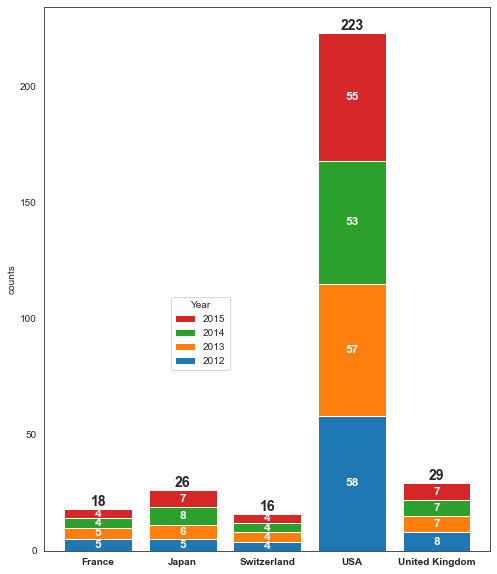

<Figure size 288x1008 with 0 Axes>

In [14]:
#get the top 5 countries counts
top5=count_100.nlargest(5).reset_index()
top5.rename(columns={'world_rank':'count_100'}, inplace=True)

#get the top 5 countries count across the years for a deeper insight to the distribution
top100ct=df.loc[df.world_rank <= 100].groupby(['country'])['year'].value_counts().unstack(level=1)
top100ct.reset_index(inplace=True)
top5ct=top100ct.loc[top100ct.country.isin(top5.country)]

cntry=top5ct["country"]
year2012=top5ct[2012]
year2013=top5ct[2013]
year2014=top5ct[2014]
year2015=top5ct[2015]
r = range(len(cntry))

# setting fig size
width = 8
height = 10
fig, ax = plt.subplots(figsize=(width,height))

# Setting axis labels
plt.xticks(r, cntry, fontweight='bold')
plt.ylabel('counts');

# Custom X axis
ax1 = plt.bar(r, year2012, label="2012")
ax2 = plt.bar(r, year2013, bottom=np.array(year2012), label='2013')
ax3 = plt.bar(r, year2014, bottom=np.array(year2012)+np.array(year2013), label='2014')
ax4 = plt.bar(r, year2015, bottom=np.array(year2012)+np.array(year2013)+np.array(year2014), label='2015')

handles, labels = ax.get_legend_handles_labels()   #get the handles
ax.legend(reversed(handles), reversed(labels),title='Year',loc="center",bbox_to_anchor=(0.35, 0.4))

for r1, r2, r3, r4 in zip(ax1, ax2, ax3,ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=12, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d" % h3, ha="center", va="center", color="white", fontsize=12, fontweight="bold")
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%d" % h4, ha="center", va="center", color="white", fontsize=12, fontweight="bold")
    plt.text(r1.get_x() + r1.get_width() / 2., h1+h2+h3+h4, '%d'% (h1+h2+h3+h4), ha = 'center', va='bottom',fontweight="bold", fontsize=14)

plt.figure(figsize=(4,14))
print('Institutions by country making into top100 across years is quite consistent')
print('Japan universities making into top 100 have been steadily increasing')

plt.show();


### 4. Groupby year and country showing the count of universities with world_rank within top 100 for that country and year. Set the name for column of counts as 'count_top100'. Sort the year in ascending order while count_top100 in descending order. See the table below as example output.

In [15]:
pivot1 = pd.pivot_table(df[df.world_rank <= 100],
               index=['year','country'], 
               values=['world_rank'],
               aggfunc='count')
pivot1.sort_values(by=['year','world_rank'], ascending=[True, False], inplace= True)
pivot1.rename(columns={'world_rank':'count_top100'})

count_top100
year country                     
2012 USA                       58
     United Kingdom             8
     France                     5
     Japan                      5
     Israel                     4
...                           ...
2015 Norway                     1
     Russia                     1
     Singapore                  1
     Sweden                     1
     Taiwan                     1

[72 rows x 1 columns]

### 5. Use an appropriate visual chart to display the trend for the count of top 100 universities for Japan, China and Singapore for years 2012 - 2015 in a single chart.

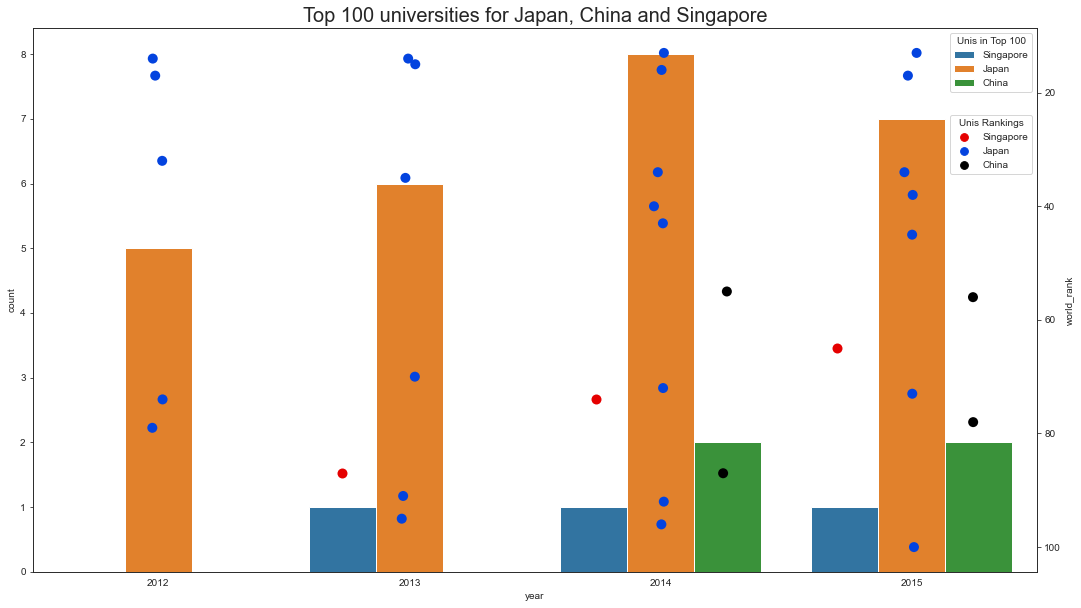

While Japan leads with the highest count of universities in top 100 over the years 
Japan also has >=50% universities in the top 45 world rank (blue dots)

China is also coming on strongly with 2 universities making into top 100 in 2014 and 2015 with slight improvements (black dots)

Although Singapore has only 1 university in top 100 since 2013, but its ranking has been increasing steadily over the years (red dots - 87,74,65)


In [16]:
#extracting dataframe
jcs=df[(df.country.isin(['Japan', 'China', 'Singapore'])) & (df.world_rank <= 100)][['country','year','world_rank','institution']]
jcs=jcs.sort_values(by = ['country','year','world_rank','institution'], ascending = [False, True, True, True]) # for data visualization

#plotting first ax and size
fig, ax = plt.subplots(figsize=(18,10))
sns.countplot(x='year', hue='country', data=jcs)

#setting legend and markers color
ax.legend(title='Unis in Top 100',loc="upper right")

#sharing x axis
ax2 = ax.twinx()

# setting colors for stripplot
colors = ['red','blue','black']
g=sns.stripplot(x="year", y="world_rank", hue='country', palette=sns.xkcd_palette(colors), data=jcs, size=10, dodge=True, color='0.1')
g.legend(title='Unis Rankings',loc="upper right",bbox_to_anchor=(1, 0.85))
g.invert_yaxis()
ax.set_title('Top 100 universities for Japan, China and Singapore',size=20)

plt.show()

print('While Japan leads with the highest count of universities in top 100 over the years','\nJapan also has >=50% universities in the top 45 world rank (blue dots)')
print('\nChina is also coming on strongly with 2 universities making into top 100 in 2014 and 2015 with slight improvements (black dots)')
print('\nAlthough Singapore has only 1 university in top 100 since 2013, but its ranking has been increasing steadily over the years (red dots - 87,74,65)')
# print(jcs)
# jcs # for data visualization

### 6. For top 10 universities in 2015, what was the trend for world_rank for those universities across all the years? Which universities generally improved, and which ones declined in world_rank? Use an appropriate visual to show the trend and explain the results.

In [17]:
# Getting the top10 universities for 2015
t10=df[(df.year.isin(['2015'])) & (df.world_rank <= 10)][['world_rank','institution','country','year','quality_of_education','national_rank']]

# Getting the top10 universities for 2015 over the years
pivot3 = pd.pivot_table(df.loc[df.institution.isin(t10.institution)],
               index=['institution','year'], 
               values=['world_rank']
                       )
pivot3.sort_values(by=['institution','year'], ascending=[True, True], inplace= True)
top10rank=pivot3.reset_index()

# setting up x-axis data
x_d=pd.DataFrame(top10rank[(top10rank.institution.isin(['Harvard University']))], columns = ['year'])
x_datayear=np.vstack((np.array(x_d['year']),)*10)

# setting up y-axis data
y_d = np.array(top10rank['world_rank'])
y_datawr=np.reshape(y_d, (10,4))

# setting up institution labels
y2015=pd.DataFrame(top10rank[(top10rank.year.isin(['2015']))], columns = ['institution'])
y2015.sort_values(by=['institution'], ascending=[True], inplace= True)
institute=np.array(y2015['institution'])

# setting up line size and colors
mode_size = [12, 8, 8, 8, 12, 8, 12, 8, 12, 8]
line_size = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
colors = ['rgb(0,255,0)', 'rgb(0,0,255)', 'rgb(192,192,192)', 'rgb(255,0,255)','rgb(255,0,0)', 
          'rgb(255,215,0)', 'rgb(0,100,0)', 'rgb(0,0,0)','rgb(255,140,0)', 'rgb(0,0,128)']

x_data = x_datayear
y_data = y_datawr
labels = institute

fig = go.Figure()
for i in range(0, len(labels)):
    fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines', name=labels[i],                   
        line=dict(color=colors[i], width=line_size[i]),
        marker=dict(color=colors[i], size=line_size[i]),
        connectgaps=True,
    ))

for j in range(0, len(labels)):
    fig.add_trace(go.Scatter(x=x_data[j], y=y_data[j], mode='markers', name=labels[j],
        marker=dict(color=colors[j], size=mode_size[j]),
        connectgaps=True,
    ))    
    
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        dtick = 1,
        constrain='domain',
        tickfont=dict(
            family='Arial',
            size=12 ,
            color='rgb(0,0,0)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
        automargin= True,
    ),
    autosize=True,
    margin=dict(
        autoexpand=True,
        l=250,
        r=250,
        t=50,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=(label +' (Rank {})').format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=12,color='rgb(1,1,1)'),
                                  showarrow=False
                           )
                      )
#     labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[3],
                                  xanchor='left', yanchor='middle',
                                  text=(label +' (Rank {})').format(y_trace[3]),
                                  font=dict(family='Arial',
                                            size=12,color='rgb(1,1,1)'),
                                  showarrow=False)
                      )
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.05, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Top 10 university ranking (2015) trend',
                              font=dict(family='Arial',
                                        size=25,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(annotations=annotations)

print('Top 10 Rankings')
print('"Harvard University" (Rank 1): maintains its leadership position throughout the years\n')
print('"Stanford University" (Rank 2): inches closer to the peak from Rank 3 in 2012\n')
print('"Massachusetts Institute of Technology" (Rank 3): Slight decline from Rank 2 in 2012 to Rank 4 in 2013 before recovering back to Rank 3 from 2014\n')
print('"University of Cambridge" (Rank 4): hold its fort at Rank 4 despite a drop of 1 ranking to Rank 5 in 2013\n')
print('"University of Oxford" (Rank 5): Significant improvement observed from 2012 to 2013 (up 4 rankings from Rank 7 to top 3) before declining by 2 rankings, stablizing at Rank 5\n')

print('Strong improvements of 3 rankings:\n','"Columbia University" (Rank 6): vs Rank 9 in 2012\n','"University of California, Berkeley" (Rank 7): vs Rank 10 in 2012\n','"University of Chicago" (Rank 8): vs Rank 11 in 2012\n')
print('"Princeton University" (Rank 9): Suffered the most drop from Rank 6 to Rank 9,\n')
print('"Cornell University" (Rank 10): Despite a slight trip to Rank 13 in 2013 (from Rank 12 in 2012), it rebounded up 3 rankings to settle within Top 10 in 2015)\n')

fig.show()

Top 10 Rankings
"Harvard University" (Rank 1): maintains its leadership position throughout the years

"Stanford University" (Rank 2): inches closer to the peak from Rank 3 in 2012

"Massachusetts Institute of Technology" (Rank 3): Slight decline from Rank 2 in 2012 to Rank 4 in 2013 before recovering back to Rank 3 from 2014

"University of Cambridge" (Rank 4): hold its fort at Rank 4 despite a drop of 1 ranking to Rank 5 in 2013

"University of Oxford" (Rank 5): Significant improvement observed from 2012 to 2013 (up 4 rankings from Rank 7 to top 3) before declining by 2 rankings, stablizing at Rank 5

Strong improvements of 3 rankings:
 "Columbia University" (Rank 6): vs Rank 9 in 2012
 "University of California, Berkeley" (Rank 7): vs Rank 10 in 2012
 "University of Chicago" (Rank 8): vs Rank 11 in 2012

"Princeton University" (Rank 9): Suffered the most drop from Rank 6 to Rank 9,

"Cornell University" (Rank 10): Despite a slight trip to Rank 13 in 2013 (from Rank 12 in 2012), it r

Top 10 Rankings:

Harvard University (Rank 1): maintains its leadership position throughout the years

Stanford University (Rank 2): inches closer to the peak from Rank 3 in 2012

Massachusetts Institute of Technology (Rank 3): Slight decline from Rank 2 in 2012 to Rank 4 in 2013 before recovering back to Rank 3 from 2014

University of Cambridge (Rank 4): hold its fort at Rank 4 despite a drop of 1 ranking to Rank 5 in 2013

University of Oxford (Rank 5): Significant improvement observed from 2012 to 2013 (up 4 rankings from Rank 7 to top 3) before declining by 2 rankings, stablizing at Rank 5

Strong improvements of 3 rankings for Columbia, California and Chicago.

Columbia University (Rank 6): vs Rank 9 in 2012

University of California, Berkeley (Rank 7): vs Rank 10 in 2012

University of Chicago (Rank 8): vs Rank 11 in 2012

Princeton University (Rank 9): Suffered the most drop from Rank 6 to Rank 9

Cornell University (Rank 10): Despite a slight trip to Rank 13 in 2013 (from Rank 12 in 2012), it rebounded up 3 rankings to settle within Top 10 in 2015)

# C. OPEN ENDED QUESTION (Choose 1 among the following)
### Option 1: What are some of the factors (variables) that may be related to the world_rank and/or score? Is there any trends indicating shift in importance of factors influencing world_rank over the years or between countries? 

### Option 2: What are the relationships between the factors (variables) themselves? Is there any interesting patterns that can be detected? You may also choose to discuss yearly or country trends or a mixture of both. 

### For either of the above, you may choose to pick around 3-4 factors to deep-dive (how many factors to analyse is up to you). Additionally, if there's any other interesting insights about the data, you may also include in your analysis. 

Factors with postive correlations (r>=0.8): world_rank, publications, influence, citations, broad_impact

Factors with negative correlations: "score" - but not significant enough as negative correlation is only 0.6935



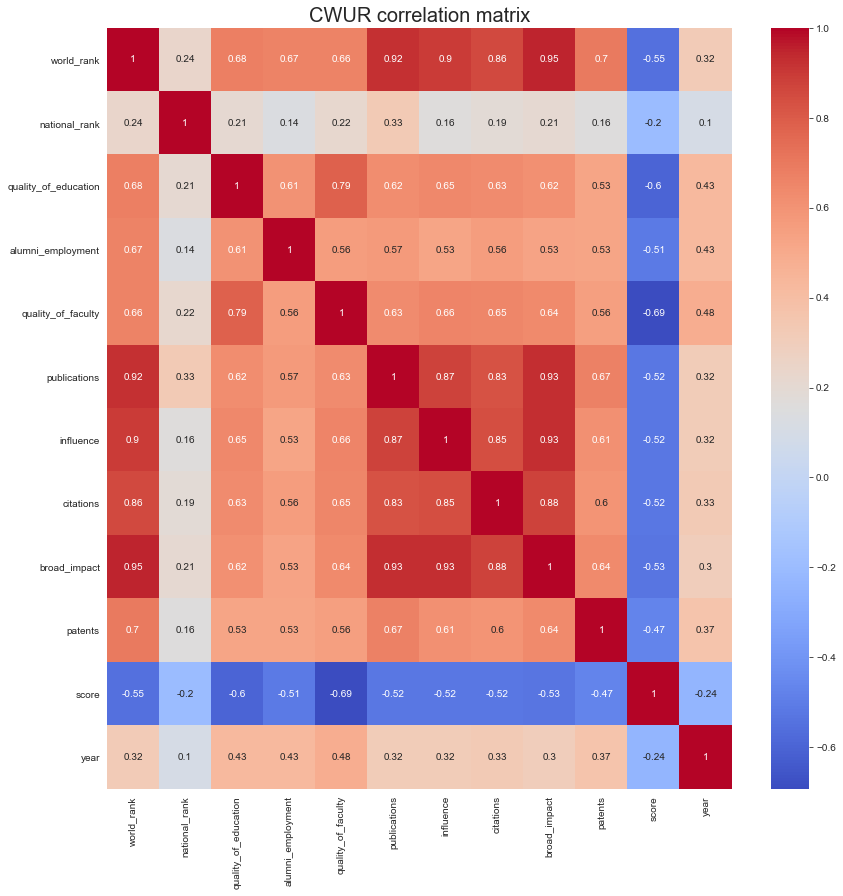

In [18]:
cor=df.corr()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(cor,cmap='coolwarm', annot=True);
plt.title('CWUR correlation matrix',size=20)

print('Factors with postive correlations (r>=0.8): world_rank, publications, influence, citations, broad_impact\n')
print('Factors with negative correlations: "score" - but not significant enough as negative correlation is only 0.6935\n')

In [19]:
df2012 = df.loc[df.year == 2012].corr()
df2013 = df.loc[df.year == 2013].corr()
df2014 = df.loc[df.year == 2014].corr()
df2015 = df.loc[df.year == 2015].corr()
corwr = pd.DataFrame(cor['world_rank'][:].nlargest(12), columns = ['world_rank'])


df2012c = pd.DataFrame(df2012['world_rank'][:].nlargest(12), columns = ['world_rank'])
df2013c = pd.DataFrame(df2013['world_rank'][:].nlargest(12), columns = ['world_rank'])
df2014c = pd.DataFrame(df2014['world_rank'][:].nlargest(12), columns = ['world_rank'])
df2015c = pd.DataFrame(df2015['world_rank'][:].nlargest(12), columns = ['world_rank'])

df2012c.rename(columns={'world_rank':'2012'}, inplace=True)
df2013c.rename(columns={'world_rank':'world_rank2013'}, inplace=True)
df2014c.rename(columns={'world_rank':'world_rank2014'}, inplace=True)
df2015c.rename(columns={'world_rank':'world_rank2015'}, inplace=True)
corwr.rename(columns={'world_rank':'Worldavg'}, inplace=True)


df2012c['2013']=df2013c['world_rank2013']
df2012c['2014']=df2014c['world_rank2014']
df2012c['2015']=df2015c['world_rank2015']
final=df2012c.copy()
final['world']=corwr['Worldavg']
final


,2012,2013,2014,2015,world
world_rank,1.000000,1.000000,1.000000,1.000000,1.000000
quality_of_faculty,0.769597,0.752396,0.573340,0.572304,0.663864
influence,0.705230,0.689526,0.870616,0.876108,0.895871
citations,0.675746,0.670102,0.826578,0.823055,0.856573
publications,0.627693,0.669520,0.905481,0.907588,0.923037
patents,0.576362,0.539342,0.629804,0.639701,0.698214
quality_of_education,0.563944,0.549999,0.599191,0.577612,0.676166
alumni_employment,0.418279,0.525440,0.602440,0.586218,0.668529
broad_impact,0.366515,0.543895,0.938793,0.947204,0.949721
national_rank,0.243865,0.314577,0.195299,0.207617,0.238553


In [20]:
df2012carr = np.array(df2012c)
df2012cx=np.vstack((np.array(df2012c.columns),)*11)
df2012index = np.array(df2012c.index)
x_data = df2012cx
y_data = df2012carr
labels = df2012index

# setting up line size and colors
mode_size = [12, 8, 8, 8, 12, 8, 12, 8, 12, 8, 8]
line_size = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
colors = ['rgb(0,255,0)', 'rgb(0,0,255)', 'rgb(192,192,192)', 'rgb(255,0,255)','rgb(255,0,0)', 
          'rgb(255,215,0)', 'rgb(0,100,0)', 'rgb(0,0,0)','rgb(255,140,0)', 'rgb(0,0,128)', 'rgb(0,0,0)']

fig = go.Figure()
for i in range(0, len(labels)):
    fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines+markers', name=labels[i],                   
        line=dict(color=colors[i], width=line_size[i]),
        marker=dict(color=colors[i], size=line_size[i]),
        connectgaps=True,
    ))
    
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=1,
        ticks='outside',
        dtick = 1,
        constrain='domain',
        tickfont=dict(
            family='Arial',
            size=12 ,
            color='rgb(0,0,0)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
        automargin= True,
    ),
    autosize=True,
    margin=dict(
        autoexpand=True,
        l=250,
        r=250,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=(label +' ({})').format(round(y_trace[0],2)),
                                  font=dict(family='Arial',
                                            size=8,color='rgb(1,1,1)'),
                                  showarrow=False
                           )
                      )
#     labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=1, y=y_trace[3],
                                  xanchor='left', yanchor='middle',
                                  text=(label +' ({})').format(round(y_trace[3],2)),
                                  font=dict(family='Arial',
                                            size=8,color='rgb(1,1,1)'),
                                  showarrow=False)
                      )
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.3, y=0.5,
                              xanchor='left', yanchor='top',
                              text='Correlation trend',
                              font=dict(family='Arial',
                                        size=25,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# fig['layout']['yaxis']['autorange'] = "reversed"

fig.update_layout(annotations=annotations)
fig.show()

The data was collected by The Center for World University Rankings. 
Sampling was weighted based on the following criteria: 
    research output, (10%), high-quality publication, (10%), 
    influence, (10%), citations, (10%), quality of faculty, (10%), 
    alumni employment, (25%), quality of education, (25%). 
    The totals of the above criteria is then used the create an aggregation and scoring.

With such a weightage of (50% emphasis) placed on alumni employment and quality of education for the data samples used in the CWUR, the correlation for alumni employment/quality of education variables remains average against world rank (0.668,0.676) / score (-0.600541,-0.510374)
We can infer that getting a costly education in top tier university (with the exception of Harvard/Stamford) does not guarantee business leaders (CEO)/ generate economic value via entreprenuership.

The fact that broad impact, publication, influence, citations has significantly contribute strongly over the years in relation to world rank (with r>=0.8), only goes to show that academics feed off academics - where thesis, publications get recognized in the academic arena thereby increasing the university's influence and broad impact. Whether greater economic value is created through top tier universities versus the others remains a question for the future